# Work for Project: Roshan Ravichandran

In [1]:
import math
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from typing import Dict
import csv
from typing import NamedTuple
from scipy.spatial import distance
from collections import defaultdict
Vector = List[float]

In [25]:
original = pd.read_csv("vehicles.csv", engine = "python", encoding = "latin1")
usedcars = original[["price", "year", "manufacturer", "condition", "cylinders", "odometer", "title_status", "transmission"]]

In [26]:
print((usedcars[["year", "price", "odometer"]]).corr())

              year     price  odometer
year      1.000000 -0.004925 -0.157215
price    -0.004925  1.000000  0.010032
odometer -0.157215  0.010032  1.000000


## A scatterplot between the year and the price

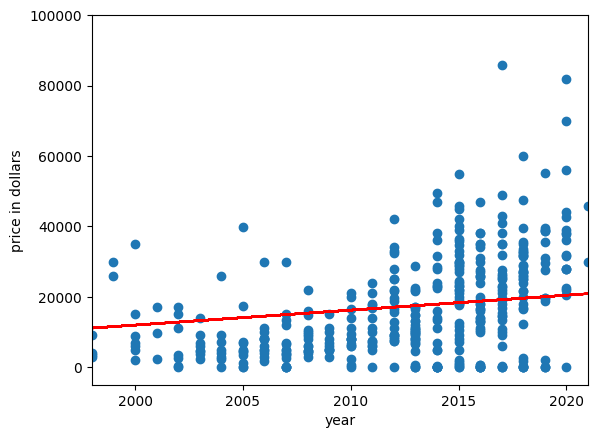

In [37]:
#Setting up a scatter plot between the year and the price
fig, ax = plt.subplots()
year = usedcars["year"][::1000]
price = usedcars["price"][::1000]

#plotting the line
ax.scatter(year, price)

# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
noNaN = np.isfinite(year) & np.isfinite(price)
m, b = np.polyfit(year[noNaN], price[noNaN], deg=1)
ax.plot(year, m * year + b, color="red")
#labels
plt.xlabel("year")
plt.ylabel("price in dollars")

# setting the limits to make it easy to view
plt.ylim(-5000, 100000)
plt.xlim(1998, 2021)
plt.show()

#### As shown by the regression line, there's a slightly positive relationship between the year and the price. In other words, the more recent a car enters the used car market, the higher its price is, ever so slightly

## Plotting the relationship between the mileage and the price

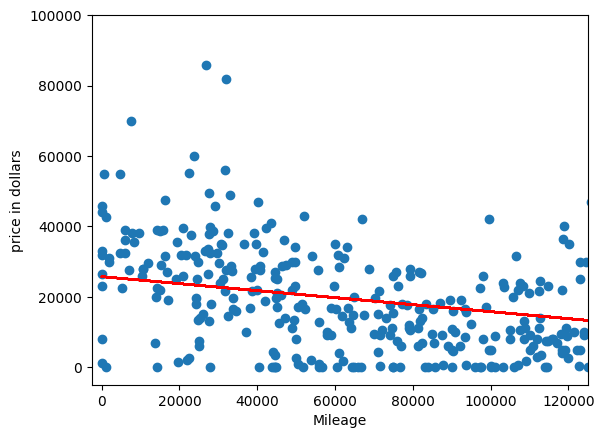

In [43]:
#Setting up a scatter plot between the mileage and the price
fig, ax = plt.subplots()
mileage = usedcars["odometer"][::1000]
price = usedcars["price"][::1000]

#plotting the line
ax.scatter(mileage, price)

# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
noNaN = np.isfinite(mileage) & np.isfinite(price)
m, b = np.polyfit(mileage[noNaN], price[noNaN], deg=1)
ax.plot(mileage, m * mileage + b, color="red")
#labels
plt.xlabel("Mileage")
plt.ylabel("price in dollars")

# setting the limits to make it easy to view
plt.ylim(-5000, 100000)
plt.xlim(-2500, 125000)
plt.show()

#### Unlike the relationship between the year and the price, the relationship between the mileage of a car and its price is negative, meaning that the more a car has been driven, the lower its price becomes